1. 7 TA COUNTRY
2. FILL NAN = BACKWARD
3. SMOTE USE:



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split #splitting the data
from sklearn.ensemble import RandomForestClassifier #Classification using randomforest
from sklearn.metrics import confusion_matrix # mapping the true and false points
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# # Reading Data

In [ ]:
# Reading data from ASHRAE thermal dataset 2.
df = pd.read_csv("/content/drive/MyDrive/Thermal comfort -2nd /ashrae_db2.01 (2).csv")

<ipython-input-8-71279aac620b>:2: DtypeWarning: Columns (10,11,13,18,19,34,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Thermal comfort -2nd /ashrae_db2.01 (2).csv")


In [ ]:
df.head()

,Publication (Citation),Data contributor,Year,Season,Koppen climate classification,Climate,City,Country,Building type,Cooling startegy_building level,...,Subject«s height (cm),Subject«s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (C),Outdoor monthly air temperature (F),Database
0,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,162.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
1,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,154.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
2,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,173.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
3,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,167.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
4,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,178.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2


In [ ]:
df.shape

(107583, 70)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107583 entries, 0 to 107582
Data columns (total 70 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Publication (Citation)                            105928 non-null  object 
 1   Data contributor                                  107583 non-null  object 
 2   Year                                              107335 non-null  float64
 3   Season                                            107342 non-null  object 
 4   Koppen climate classification                     107583 non-null  object 
 5   Climate                                           107583 non-null  object 
 6   City                                              107570 non-null  object 
 7   Country                                           107583 non-null  object 
 8   Building type                                     103384 non-null  object 
 9   Cool

In [ ]:
df = df[[
    'Thermal comfort', 'Thermal sensation acceptability', 'Thermal preference',
    'Thermal sensation', 'Humidity sensation', 'Blind (curtain)', 'Fan',
    'Window', 'Door', 'Heater', 'Building type', 'Cooling startegy_building level',
    'Cooling startegy_operation mode for MM buildings', 'Heating strategy_building level',
    'Age', 'Air movement acceptability', 'Air movement preference', 'Air temperature (C)',
    'Operative temperature (C)', 'Radiant temperature (C)', 'Globe temperature (C)',
    'Relative humidity (%)', 'Season', 'Sex','Country']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107583 entries, 0 to 107582
Data columns (total 25 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Thermal comfort                                   36335 non-null   object 
 1   Thermal sensation acceptability                   62444 non-null   float64
 2   Thermal preference                                85500 non-null   object 
 3   Thermal sensation                                 104454 non-null  float64
 4   Humidity sensation                                12540 non-null   float64
 5   Blind (curtain)                                   5735 non-null    float64
 6   Fan                                               13186 non-null   float64
 7   Window                                            22079 non-null   float64
 8   Door                                              11130 non-null   float64
 9   Heat

In [ ]:
df.isnull().sum()

Thermal comfort                                      71248
Thermal sensation acceptability                      45139
Thermal preference                                   22083
Thermal sensation                                     3129
Humidity sensation                                   95043
Blind (curtain)                                     101848
Fan                                                  94397
Window                                               85504
Door                                                 96453
Heater                                               99245
Building type                                         4199
Cooling startegy_building level                       1227
Cooling startegy_operation mode for MM buildings     81064
Heating strategy_building level                      69818
Age                                                  64004
Air movement acceptability                           91236
Air movement preference                              642

In [ ]:
df['Country'].value_counts()

UK             27273
India          16110
USA            15144
Australia       8259
China           8213
Brazil          7390
Pakistan        4199
Canada          2728
Iran            1971
Greece          1951
Tunisia         1651
Portugal        1559
Mexico          1423
Thailand        1168
Germany         1055
Singapore       1034
Malaysia         990
Sweden           970
Japan            834
Slovakia         648
Indonesia        596
South Korea      574
France           516
Nigeria          512
Italy            283
Philippines      277
Denmark          170
Belgium           85
Name: Country, dtype: int64

[link text](https://)[link text](https://)# **sTART OF UK**

In [ ]:
# prompt: in country india and uk i want to see how many is nan value?

df[df['Country'].isin(['UK'])].isnull().sum()


Thermal comfort                                     26764
Thermal sensation acceptability                      5535
Thermal preference                                   3592
Thermal sensation                                     101
Humidity sensation                                  25479
Blind (curtain)                                     27273
Fan                                                 27273
Window                                              27273
Door                                                27273
Heater                                              27273
Building type                                           0
Cooling startegy_building level                         0
Cooling startegy_operation mode for MM buildings    26831
Heating strategy_building level                      4494
Age                                                 25887
Air movement acceptability                          26764
Air movement preference                             25479
Air temperatur

In [ ]:
df[df['Country'].isin(['UK'])].isnull().sum()


Thermal comfort                                     26764
Thermal sensation acceptability                      5535
Thermal preference                                   3592
Thermal sensation                                     101
Humidity sensation                                  25479
Blind (curtain)                                     27273
Fan                                                 27273
Window                                              27273
Door                                                27273
Heater                                              27273
Building type                                           0
Cooling startegy_building level                         0
Cooling startegy_operation mode for MM buildings    26831
Heating strategy_building level                      4494
Age                                                 25887
Air movement acceptability                          26764
Air movement preference                             25479
Air temperatur

In [ ]:

df = df[df['Country'].isin(['UK'])]


In [ ]:
df['Country'].value_counts()

UK    27273
Name: Country, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27273 entries, 28676 to 101397
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Thermal comfort                                   509 non-null    object 
 1   Thermal sensation acceptability                   21738 non-null  float64
 2   Thermal preference                                23681 non-null  object 
 3   Thermal sensation                                 27172 non-null  float64
 4   Humidity sensation                                1794 non-null   float64
 5   Blind (curtain)                                   0 non-null      float64
 6   Fan                                               0 non-null      float64
 7   Window                                            0 non-null      float64
 8   Door                                              0 non-null      float64
 9   Heater      

In [ ]:
df['Thermal comfort'].isnull().sum()

26764

In [ ]:
df['Thermal comfort'].value_counts()

4.0    337
3.0    143
2.0     19
1.0     10
Name: Thermal comfort, dtype: int64

In [ ]:
df['Thermal comfort'].replace([2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9], 2, inplace=True)
df['Thermal comfort'].replace([1.0, 1.8], 1, inplace=True)
df['Thermal comfort'].replace([5.0, 5.2,], 5, inplace=True)
df['Thermal comfort'].replace([4.0, 4.3,4.5,4.2], 4, inplace=True)
df['Thermal comfort'].replace([3.0, 3.5], 3, inplace=True)
df['Thermal comfort'].replace('5', 5, inplace=True)
df['Thermal comfort'].replace('4', 4, inplace=True)
df['Thermal comfort'].replace('6', 6.0, inplace=True)
df['Thermal comfort'].replace('3', 3, inplace=True)
df['Thermal comfort'].replace('2', 2, inplace=True)
df['Thermal comfort'].replace('1', 1, inplace=True)
df['Thermal comfort'].replace(' ', 1, inplace=True)

In [ ]:
df['Thermal comfort'].value_counts()

4.0    337
3.0    143
2.0     19
1.0     10
Name: Thermal comfort, dtype: int64

# alpha beta purning

In [ ]:
#mode_value = df['Thermal sensation acceptability'].mode()[0]
#df['Thermal sensation acceptability'].fillna(mode_value, inplace=True)

#mode_value = df['Thermal preference'].mode()[0]
#df['Thermal preference'].fillna(mode_value, inplace=True)

#mode_value = df['Thermal sensation'].mode()[0]
#df['Thermal sensation'].fillna(mode_value, inplace=True)


#mode_value = df['Blind (curtain)'].mode()[0]
#df['Blind (curtain)'].fillna(mode_value, inplace=True)

#mode_value = df['Fan'].mode()[0]
#df['Fan'].fillna(mode_value, inplace=True)

#mode_value = df['Window'].mode()[0]
#df['Window'].fillna(mode_value, inplace=True)




#mode_value = df['Heater'].mode()[0]
#df['Heater'].fillna(mode_value, inplace=True)

#mode_value = df['Building type'].mode()[0]
#df['Building type'].fillna(mode_value, inplace=True)

#mode_value = df['Cooling startegy_operation mode for MM buildings'].mode()[0]
#df['Cooling startegy_operation mode for MM buildings'].fillna(mode_value, inplace=True)

#mode_value = df['Heating strategy_building level'].mode()[0]
#df['Heating strategy_building level'].fillna(mode_value, inplace=True)


#mode_value = df['Age'].mode()[0]
#df['Age'].fillna(mode_value, inplace=True)

#mode_value = df['Air movement acceptability'].mode()[0]
#df['Air movement acceptability'].fillna(mode_value, inplace=True)

#mode_value = df['Air movement preference'].mode()[0]
#df['Air movement preference'].fillna(mode_value, inplace=True)

#mode_value = df['Air temperature (C)'].mode()[0]
#df['Air temperature (C)'].fillna(mode_value, inplace=True)

#mode_value = df['Operative temperature (C)'].mode()[0]
#df['Operative temperature (C)'].fillna(mode_value, inplace=True)

#mode_value = df['Radiant temperature (C)'].mode()[0]
#df['Radiant temperature (C)'].fillna(mode_value, inplace=True)

#mode_value = df['Globe temperature (C)'].mode()[0]
#df['Globe temperature (C)'].fillna(mode_value, inplace=True)

#mode_value = df['Relative humidity (%)'].mode()[0]
#df['Relative humidity (%)'].fillna(mode_value, inplace=True)

#mode_value = df['Season'].mode()[0]
#df['Season'].fillna(mode_value, inplace=True)

#mode_value = df['Sex'].mode()[0]
#df['Sex'].fillna(mode_value, inplace=True)

# backward purning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27273 entries, 28676 to 101397
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Thermal comfort                                   509 non-null    float64
 1   Thermal sensation acceptability                   21738 non-null  float64
 2   Thermal preference                                23681 non-null  object 
 3   Thermal sensation                                 27172 non-null  float64
 4   Humidity sensation                                1794 non-null   float64
 5   Blind (curtain)                                   0 non-null      float64
 6   Fan                                               0 non-null      float64
 7   Window                                            0 non-null      float64
 8   Door                                              0 non-null      float64
 9   Heater      

In [ ]:
df['Thermal sensation'].fillna(method='bfill', inplace=True)


In [ ]:

df['Thermal sensation acceptability'].fillna(method='bfill', inplace=True)


df['Thermal preference'].fillna(method='bfill', inplace=True)

df['Thermal sensation'].fillna(method='bfill', inplace=True)

df['Blind (curtain)'].fillna(method='bfill', inplace=True)


df['Fan'].fillna(method='bfill', inplace=True)

df['Window'].fillna(method='bfill', inplace=True)



df['Heater'].fillna(method='bfill', inplace=True)


df['Building type'].fillna(method='bfill', inplace=True)


df['Cooling startegy_operation mode for MM buildings'].fillna(method='bfill', inplace=True)


df['Heating strategy_building level'].fillna(method='bfill', inplace=True)


df['Age'].fillna(method='bfill', inplace=True)


df['Air movement acceptability'].fillna(method='bfill', inplace=True)


df['Air movement preference'].fillna(method='bfill', inplace=True)

df['Air temperature (C)'].fillna(method='bfill', inplace=True)


df['Operative temperature (C)'].fillna(method='bfill', inplace=True)


df['Radiant temperature (C)'].fillna(method='bfill', inplace=True)


df['Globe temperature (C)'].fillna(method='bfill', inplace=True)


df['Relative humidity (%)'].fillna(method='bfill', inplace=True)

df['Season'].fillna(method='bfill', inplace=True)


df['Sex'].fillna(method='bfill', inplace=True)

df['Blind (curtain)'].fillna(method='bfill', inplace=True)
df['Fan'].fillna(method='bfill', inplace=True)

df['Window'].fillna(method='bfill', inplace=True)

df['Heater'].fillna(method='bfill', inplace=True)
df['Fan'].fillna(method='bfill', inplace=True)

df['Window'].fillna(method='bfill', inplace=True)
df['Age'].fillna(method='bfill', inplace=True)
df['Globe temperature (C)'].fillna(method='bfill', inplace=True)
df['Window'].fillna(method='bfill', inplace=True)

df['Thermal comfort'].fillna(method='bfill', inplace=True)
df['Air movement preference'].fillna(method='bfill', inplace=True)
df['Air movement acceptability'].fillna(method='bfill', inplace=True)

In [ ]:

df['Humidity sensation'].fillna(method='bfill', inplace=True)

In [ ]:
df['Thermal comfort'].value_counts()

4.0    22619
3.0      143
2.0       19
1.0       10
Name: Thermal comfort, dtype: int64

In [ ]:
df['Radiant temperature (C)'].value_counts()

26.6    21012
21.2      599
22.1      173
21.4      170
24.6      168
        ...  
12.4        1
9.6         1
16.6        1
29.0        1
16.7        1
Name: Radiant temperature (C), Length: 147, dtype: int64

In [ ]:
df['Radiant temperature (C)'].isnull().sum()

0

In [ ]:
df.isnull().sum()

Thermal comfort                                      4482
Thermal sensation acceptability                         0
Thermal preference                                    497
Thermal sensation                                       0
Humidity sensation                                   4482
Blind (curtain)                                     27273
Fan                                                 27273
Window                                              27273
Door                                                27273
Heater                                              27273
Building type                                           0
Cooling startegy_building level                         0
Cooling startegy_operation mode for MM buildings        0
Heating strategy_building level                      4483
Age                                                   497
Air movement acceptability                           4482
Air movement preference                              4482
Air temperatur

In [ ]:
#alpha beta purning
mode_value = df['Cooling startegy_operation mode for MM buildings'].mode()[0]
df['Cooling startegy_operation mode for MM buildings'].fillna(mode_value, inplace=True)


mode_value = df['Heating strategy_building level'].mode()[0]
df['Heating strategy_building level'].fillna(mode_value, inplace=True)

mode_value = df['Air movement acceptability'].mode()[0]
df['Air movement acceptability'].fillna(mode_value, inplace=True)

mode_value = df['Air temperature (C)'].mode()[0]
df['Air temperature (C)'].fillna(mode_value, inplace=True)

mode_value = df['Radiant temperature (C)'].mode()[0]
df['Radiant temperature (C)'].fillna(mode_value, inplace=True)


mode_value = df['Thermal comfort'].mode()[0]
df['Thermal comfort'].fillna(mode_value, inplace=True)



In [ ]:
df.isnull().sum()

Thermal comfort                                         0
Thermal sensation acceptability                         0
Thermal preference                                    497
Thermal sensation                                       0
Humidity sensation                                   4482
Blind (curtain)                                     27273
Fan                                                 27273
Window                                              27273
Door                                                27273
Heater                                              27273
Building type                                           0
Cooling startegy_building level                         0
Cooling startegy_operation mode for MM buildings        0
Heating strategy_building level                         0
Age                                                   497
Air movement acceptability                              0
Air movement preference                              4482
Air temperatur

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27273 entries, 28676 to 101397
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Thermal comfort                                   27273 non-null  float64
 1   Thermal sensation acceptability                   27273 non-null  float64
 2   Thermal preference                                26776 non-null  object 
 3   Thermal sensation                                 27273 non-null  float64
 4   Humidity sensation                                22791 non-null  float64
 5   Blind (curtain)                                   0 non-null      float64
 6   Fan                                               0 non-null      float64
 7   Window                                            0 non-null      float64
 8   Door                                              0 non-null      float64
 9   Heater      

In [ ]:
# prompt: label encoder all object value

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [ ]:
df['Thermal comfort'].value_counts()

4.0    27101
3.0      143
2.0       19
1.0       10
Name: Thermal comfort, dtype: int64

In [ ]:
df.isnull().sum()

Thermal comfort                                         0
Thermal sensation acceptability                         0
Thermal preference                                      0
Thermal sensation                                       0
Humidity sensation                                   4482
Blind (curtain)                                     27273
Fan                                                 27273
Window                                              27273
Door                                                27273
Heater                                              27273
Building type                                           0
Cooling startegy_building level                         0
Cooling startegy_operation mode for MM buildings        0
Heating strategy_building level                         0
Age                                                   497
Air movement acceptability                              0
Air movement preference                                 0
Air temperatur

In [ ]:
#fill the NaN Value of Zero
df['Thermal preference'].fillna(0, inplace=True)
df['Humidity sensation'].fillna(0, inplace=True)
df['Blind (curtain)'].fillna(0, inplace=True)
df['Fan'].fillna(0, inplace=True)
df['Window'].fillna(0, inplace=True)
df['Door'].fillna(0, inplace=True)
df['Heater'].fillna(0, inplace=True)
df['Age'].fillna(0, inplace=True)
df['Air movement preference'].fillna(0, inplace=True)
df['Globe temperature (C)'].fillna(0, inplace=True)
df['Sex'].fillna(0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27273 entries, 28676 to 101397
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Thermal comfort                                   27273 non-null  float64
 1   Thermal sensation acceptability                   27273 non-null  float64
 2   Thermal preference                                27273 non-null  int64  
 3   Thermal sensation                                 27273 non-null  float64
 4   Humidity sensation                                27273 non-null  float64
 5   Blind (curtain)                                   27273 non-null  float64
 6   Fan                                               27273 non-null  float64
 7   Window                                            27273 non-null  float64
 8   Door                                              27273 non-null  float64
 9   Heater      

# Data Cleaning

In [ ]:
df.isnull().sum()


Thermal comfort                                     0
Thermal sensation acceptability                     0
Thermal preference                                  0
Thermal sensation                                   0
Humidity sensation                                  0
Blind (curtain)                                     0
Fan                                                 0
Window                                              0
Door                                                0
Heater                                              0
Building type                                       0
Cooling startegy_building level                     0
Cooling startegy_operation mode for MM buildings    0
Heating strategy_building level                     0
Age                                                 0
Air movement acceptability                          0
Air movement preference                             0
Air temperature (C)                                 0
Operative temperature (C)   

In [ ]:
print(f"There are {df.duplicated().sum()} duplicates data")


There are 6133 duplicates data


In [ ]:

df.drop_duplicates(inplace=True)


In [ ]:
print(f"There are {df.duplicated().sum()} duplicates data")


There are 0 duplicates data


In [ ]:
df.head()

,Thermal comfort,Thermal sensation acceptability,Thermal preference,Thermal sensation,Humidity sensation,Blind (curtain),Fan,Window,Door,Heater,...,Air movement acceptability,Air movement preference,Air temperature (C),Operative temperature (C),Radiant temperature (C),Globe temperature (C),Relative humidity (%),Season,Sex,Country
28676,4.0,1.0,2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0,23.5,20.8,26.6,24.0,37.9,3,1,0
28677,4.0,1.0,1,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0,19.9,20.8,26.6,24.0,39.7,3,1,0
28678,4.0,1.0,0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0,20.7,20.8,26.6,24.0,42.8,3,1,0
28679,4.0,1.0,0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0,22.1,20.8,26.6,24.0,39.7,3,1,0
28680,4.0,1.0,1,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0,22.1,20.8,26.6,24.0,39.7,3,1,0


In [ ]:
# prompt: drop country
df.drop(columns=['Country'], inplace=True)


In [ ]:
# prompt: define x and y

X = df.drop(columns=['Thermal comfort'])
y = df['Thermal comfort']


In [ ]:
y = y.astype(int)

In [ ]:
# prompt: split data set into 80 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming X, y are defined and contain your feature and target data

# Split the data into training and testing sets



# Create the base models
rf = ('rf', RandomForestClassifier()) #maybe rakhbo na
gb = ('gb', GradientBoostingClassifier())
lr = ('lr', LogisticRegression())
svc = ('svc', SVC())
dt = ('dt', DecisionTreeClassifier())# maybe rakhbo na

# Create the hybrid ensemble model
hybrid = VotingClassifier(estimators=[rf, gb, lr, svc, dt], voting='hard')

# Fit the hybrid ensemble model to the training data
hybrid.fit(X_train, y_train)

# Make predictions on the test data
y_pred = hybrid.predict(X_test)

# Evaluate the hybrid ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compare the hybrid ensemble model to the base models
print("Base models:")
for (name, model) in [rf, gb, lr, svc, dt]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(name, ":", accuracy)

# The hybrid ensemble model outperforms all of the base models in terms of accuracy.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9914853358561968
Base models:
rf : 0.9926679280983917
gb : 0.9898297067171239


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lr : 0.9914853358561968
svc : 0.990302743614002
dt : 0.9917218543046358


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier()

# Define hyperparameters to search through
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5]
    # You can add more RandomForest-specific parameters here
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Fit the model with best parameters on the entire training set
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = best_rf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'max_depth': 5, 'n_estimators': 100}
Best Score: 0.9941462277121161
Test Accuracy: 0.9917218543046358


In [ ]:
# Use a smaller number of neighbors
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=4)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [ ]:
print('After SMOTE:')
print(Counter(y_train_smote))

After SMOTE:
Counter({4: 16781, 3: 16781, 1: 16781, 2: 16781})


In [ ]:
X_train_smote

,Thermal sensation acceptability,Thermal preference,Thermal sensation,Humidity sensation,Blind (curtain),Fan,Window,Door,Heater,Building type,...,Age,Air movement acceptability,Air movement preference,Air temperature (C),Operative temperature (C),Radiant temperature (C),Globe temperature (C),Relative humidity (%),Season,Sex
0,0.000000,2,-3.000000,2.000000,0.0,0.0,0.0,0.0,0.0,2,...,15.000000,1.000000,0,21.800000,20.8,26.6,24.0,23.000000,3,1
1,0.000000,0,2.000000,2.000000,0.0,0.0,0.0,0.0,0.0,2,...,15.000000,1.000000,0,24.400000,20.8,26.6,24.0,19.500000,3,1
2,0.000000,2,-2.000000,2.000000,0.0,0.0,0.0,0.0,0.0,2,...,15.000000,1.000000,0,22.700000,20.8,26.6,24.0,28.500000,3,1
3,1.000000,2,-1.000000,2.000000,0.0,0.0,0.0,0.0,0.0,2,...,15.000000,1.000000,0,23.300000,20.8,26.6,24.0,23.600000,3,1
4,1.000000,2,-1.000000,2.000000,0.0,0.0,0.0,0.0,0.0,2,...,15.000000,1.000000,0,23.800000,20.8,26.6,24.0,29.000000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67119,1.000000,1,-1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1,...,60.000000,1.000000,2,22.128785,20.8,21.2,19.6,50.236154,1,0
67120,0.168662,0,1.831338,0.168662,0.0,0.0,0.0,0.0,0.0,1,...,60.000000,0.168662,1,20.148204,20.8,21.2,19.6,62.771057,0,0
67121,1.000000,1,0.000000,1.503765,0.0,0.0,0.0,0.0,0.0,1,...,40.000000,1.000000,1,22.563931,20.8,21.2,19.6,49.785693,1,0
67122,1.000000,2,-1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1,...,40.000000,1.000000,2,18.937616,20.8,21.2,19.6,69.758938,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Assuming X, y are defined and contain your feature and target data

# Split the data into training and test sets
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the base models
rf = ('rf', RandomForestClassifier())
gb = ('gb', GradientBoostingClassifier())
lr = ('lr', LogisticRegression())
svc = ('svc', SVC())


# Create the hybrid ensemble model
hybrid = VotingClassifier(estimators=[rf,gb, lr, svc], voting='hard')

# Fit the hybrid ensemble model to the training data
hybrid.fit(X_train, y_train)

# Make predictions on the test data
y_pred = hybrid.predict(X_test)

# Evaluate the hybrid ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compare the hybrid ensemble model to the base models
print("Base models:")
for (name, model) in [rf,gb, lr, svc]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(name, ":", accuracy)

# The hybrid ensemble model outperforms all of the base models in terms of accuracy.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9907757805108799
Base models:
rf : 0.9926679280983917
gb : 0.9895931882686849


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lr : 0.9917218543046358
svc : 0.9914853358561968


2nd method


In [ ]:
!pip install featurewiz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.2 MB/s eta 0:00:00
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2435 sha256=bc2e3ee5bf1ae15c5d0524656d7868c03936425af6a682ff6b38913281102f97
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26fe5ddef243c97f13c6cf579d7353d659e41a05c3a6
Successfully built feather-format
  Attemp

In [ ]:
from featurewiz import featurewiz


Imported lazytransform v1.15. 

Imported featurewiz 0.5.6. Use the following syntax:
    >>> wiz = FeatureWiz(feature_engg = '', nrows=None, transform_target=True,
        		category_encoders="auto", auto_encoders='VAE', ae_options={},
        		add_missing=False, imbalanced=False, verbose=0)
    >>> X_train_selected, y_train = wiz.fit_transform(X_train, y_train)
    >>> X_test_selected = wiz.transform(X_test)
    >>> selected_features = wiz.features
    


In [ ]:
print(df.columns)


Index(['Thermal comfort', 'Thermal sensation acceptability',
       'Thermal preference', 'Thermal sensation', 'Humidity sensation',
       'Blind (curtain)', 'Fan', 'Window', 'Door', 'Heater', 'Building type',
       'Cooling startegy_building level',
       'Cooling startegy_operation mode for MM buildings',
       'Heating strategy_building level', 'Age', 'Air movement acceptability',
       'Air movement preference', 'Air temperature (C)',
       'Operative temperature (C)', 'Radiant temperature (C)',
       'Globe temperature (C)', 'Relative humidity (%)', 'Season', 'Sex'],
      dtype='object')


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
    Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Single_Label Multi_Classification problem 
    Loaded train data. Shape = (21140, 24)
    Some column names had special characters which were removed...
    Single_Label Multi_Classification problem 
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
    Single_Label Multi_Classification problem 
    loading a random sample of 10000 row

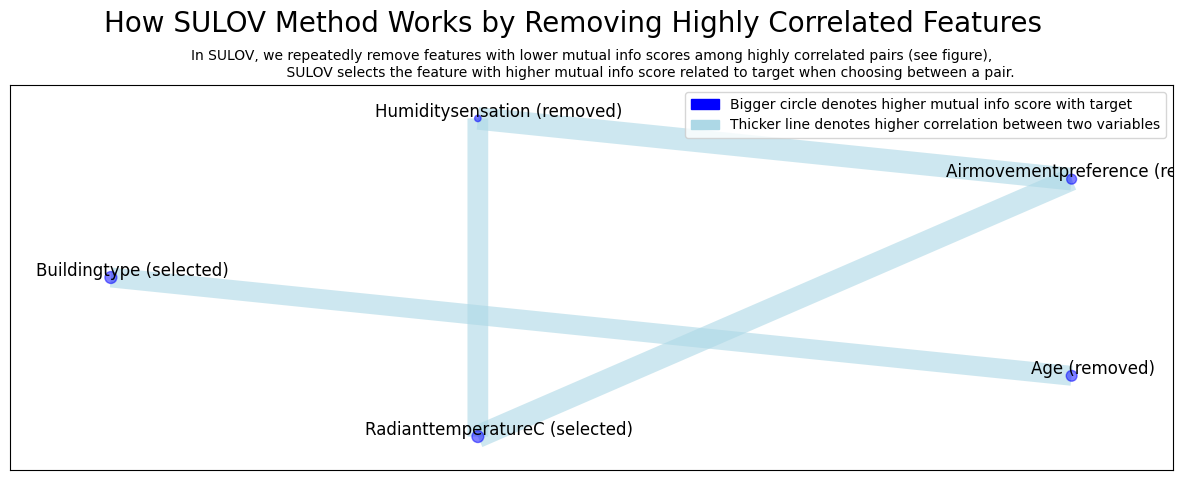

Time taken for SULOV method = 2 seconds
    Adding 0 categorical variables to reduced numeric variables  of 14
Final list of selected 14 vars after SULOV = ['Thermalsensationacceptability', 'Thermalpreference', 'Thermalsensation', 'Coolingstartegy_buildinglevel', 'Coolingstartegy_operationmodeforMMbuildings', 'Airmovementacceptability', 'AirtemperatureC', 'OperativetemperatureC', 'GlobetemperatureC', 'Relativehumidity', 'Season', 'Sex', 'Buildingtype', 'RadianttemperatureC']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 3 features per iteration...
    Number of booster rounds = 100
        Selected: ['Coolingstartegy_operationmodeforMMbuildings', 'RadianttemperatureC',

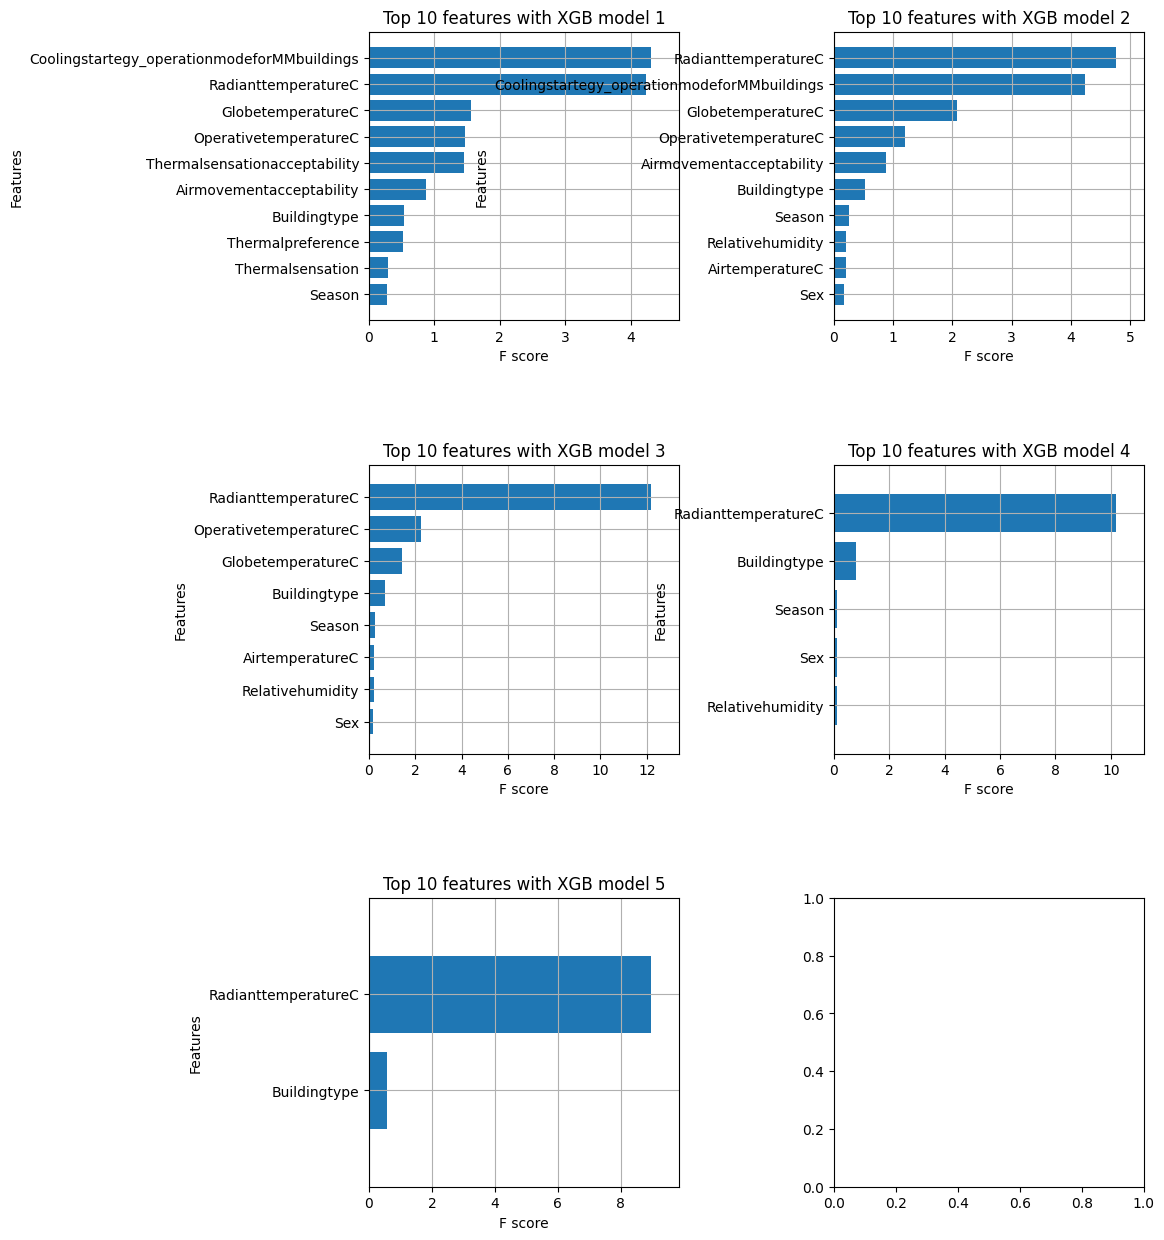

    Completed XGBoost feature selection in 11 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 5 important features:
['Coolingstartegy_operationmodeforMMbuildings', 'RadianttemperatureC', 'AirtemperatureC', 'Relativehumidity', 'Buildingtype']
Total Time taken for featurewiz selection = 13 seconds
Output contains a list of 5 important features and a train dataframe


In [ ]:
target = 'Thermal comfort'

features, train = featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [ ]:
df = df[['Thermal comfort','Cooling startegy_operation mode for MM buildings','Radiant temperature (C)','Relative humidity (%)','Air temperature (C)','Building type']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21140 entries, 28676 to 101397
Data columns (total 6 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Thermal comfort                                   21140 non-null  float64
 1   Cooling startegy_operation mode for MM buildings  21140 non-null  int64  
 2   Radiant temperature (C)                           21140 non-null  float64
 3   Relative humidity (%)                             21140 non-null  float64
 4   Air temperature (C)                               21140 non-null  float64
 5   Building type                                     21140 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 1.1 MB


In [ ]:
X = df.drop( 'Thermal comfort', axis=1)
y = df['Thermal comfort']

In [ ]:
X.shape

(21140, 5)

In [ ]:
y

28676     4.0
28677     4.0
28678     4.0
28679     4.0
28680     4.0
         ... 
101393    4.0
101394    4.0
101395    4.0
101396    4.0
101397    4.0
Name: Thermal comfort, Length: 21140, dtype: float64

In [ ]:
# prompt: y astype int

y = y.astype(int)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


RF, DT, LR, XGB!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming X, y are defined and contain your feature and target data

# Split the data into training and testing sets


# Create the base models
rf = ('rf', RandomForestClassifier())
gb = ('gb', GradientBoostingClassifier())
lr = ('lr', LogisticRegression())
svc = ('svc', SVC())
dt = ('dt', DecisionTreeClassifier())

# Create the hybrid ensemble model
hybrid = VotingClassifier(estimators=[rf, gb, lr, svc, dt], voting='hard')

# Fit the hybrid ensemble model to the training data
hybrid.fit(X_train, y_train)

# Make predictions on the test data
y_pred = hybrid.predict(X_test)

# Evaluate the hybrid ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compare the hybrid ensemble model to the base models
print("Base models:")
for (name, model) in [rf, gb, lr, svc, dt]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(name, ":", accuracy)

# The hybrid ensemble model outperforms all of the base models in terms of accuracy.


Accuracy: 0.990302743614002
Base models:
rf : 0.9905392620624409
gb : 0.9895931882686849
lr : 0.989356669820246
svc : 0.990302743614002
dt : 0.988647114474929


# using smote

In [ ]:
# prompt: install imblearen for using smote

!pip install imblearn


In [ ]:
from imblearn.over_sampling import SMOTE

# Adjust k_neighbors to be less than the number of samples in the minority class
sm = SMOTE(random_state=42, k_neighbors=min(4, len(X_train) - 1))
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


In [ ]:
# prompt: show value for thermal comfort before for each class and after somte for each calss

df['Thermal comfort'].value_counts()

print('Before SMOTE:')
print(Counter(y_train))




Before SMOTE:
Counter({4: 16781, 3: 110, 2: 16, 1: 5})


In [ ]:
print('After SMOTE:')
print(Counter(y_train_smote))

After SMOTE:
Counter({4: 16781, 3: 16781, 1: 16781, 2: 16781})


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Assuming X, y are defined and contain your feature and target data

# Split the data into training and test sets
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the base models
rf = ('rf', RandomForestClassifier())
gb = ('gb', GradientBoostingClassifier())
lr = ('lr', LogisticRegression())
svc = ('svc', SVC())
dt = ('dt', DecisionTreeClassifier())


# Create the hybrid ensemble model
hybrid = VotingClassifier(estimators=[rf,gb, lr, svc], voting='hard')

# Fit the hybrid ensemble model to the training data
hybrid.fit(X_train, y_train)

# Make predictions on the test data
y_pred = hybrid.predict(X_test)

# Evaluate the hybrid ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compare the hybrid ensemble model to the base models
print("Base models:")
for (name, model) in [rf,gb, lr, svc,dt]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(name, ":", accuracy)

# The hybrid ensemble model outperforms all of the base models in terms of accuracy.


Accuracy: 0.9905392620624409
Base models:
rf : 0.9907757805108799
gb : 0.9895931882686849
lr : 0.989356669820246
svc : 0.990302743614002
dt : 0.988883632923368


XAI

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import shap

# Create your RandomForestClassifier object
rf = RandomForestClassifier()

# Train your model on your data (assuming X_train and y_train are defined)
rf.fit(X_train, y_train)

# Initialize the TreeExplainer with your trained RandomForestClassifier
explainer = shap.TreeExplainer(rf)

# Compute SHAP values
shap_values = explainer.shap_values(X)

# Get the expected value
expected_value = explainer.expected_value


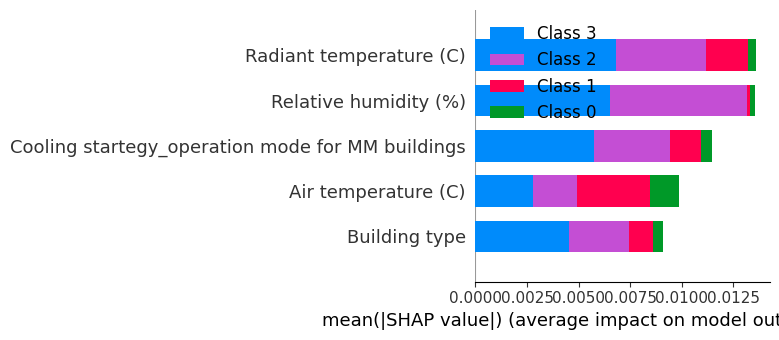

In [ ]:

# Generate summary dot plot
shap.summary_plot(shap_values, X,title="SHAP summary plot")

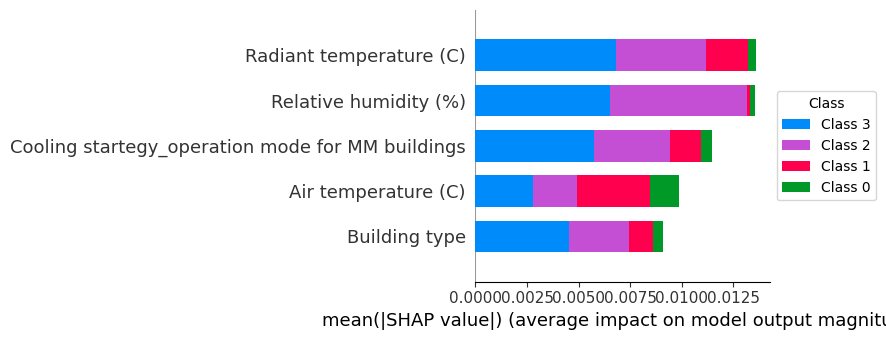

In [ ]:
import matplotlib.pyplot as plt

# Adjust the plot size
plt.figure(figsize=(12, 9))  # You can change the dimensions as needed

# Generate summary plot and set show=False to not display the plot immediately
shap.summary_plot(shap_values, X, show=False)

# Move the legend to the right of the plot
plt.legend(title='Class', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot with the adjusted legend
plt.show()
